# **Predicting Employee Attrition Using Workforce Analytics (IBM HR Analytics Dataset)**
**Introduction**

Employee-Attrition-Predicting-with-Workforce-Analytics Project revolves around applying machine learning algorithms to predict employee attrition based on various workplace and demographic conditions. It compares ensemble methods with linear models and investigates the most relevant factors affecting attrition. SHAP analysis will be conducted for result interpretation. Fairness and bias in predictive modeling will also be discussed, with an emphasis on class imbalance. The dataset is from the IBM HR Analytics Employee Attrition & Performance Dataset available on Kaggle.

**Research Questions:**

1. Can machine learning models accurately predict employee attrition, and how do ensemble methods compare to linear baselines?

2. Which workplace and demographic factors most significantly influence attrition, and can SHAP analysis explain them?

3. How can predictive models balance organizational decision-making with fairness and bias considerations, especially given class imbalance??

**Dataset Details:**


- **Name:** IBM HR Analytics Employee Attrition & Performance Dataset   
- **Source:** [Kaggle  – IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/datasets/pavansubhasht ibm-hr-analytics-attrition-dataset)  
- **Contributors:** The dataset was collected by IBM HR analytics / internal HR surveys and made public via Kaggle




#**Loading Dataset**

In [1]:
# --- Block 1: Setup & configuration ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Base models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ensemble models (used later)
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier

RANDOM_STATE = 42
N_SPLITS = 5
TARGET = "Attrition"   # change if your target column name differs


In [2]:
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)


#**Exploratory Data Analysis**
Before Training and implementing the model, EDA is performed to have an idea about the dataset regarding data distribution

**Printing Imported Dataset with shape and Summary Statistics**

In [5]:
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Printing the Columns Name from Dataset**

In [9]:
print("\nColumns in the dataset:")
df.columns




Columns in the dataset:


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Printing the shape of dataset**

In [12]:

df.shape


(1470, 35)

# **Descriptive statistical Analysis for numerical columns**

In [15]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()


Descriptive Statistics for Numerical Columns:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Count Plot**

C:\Users\srava\AppData\Local\Temp\ipykernel_24128\3897591107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='viridis') # Added palette


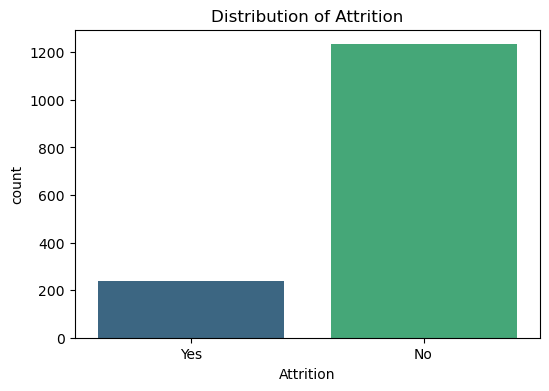

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='viridis') # Added palette
plt.title('Distribution of Attrition')
plt.show()

#**Distribution for Numerical Features**

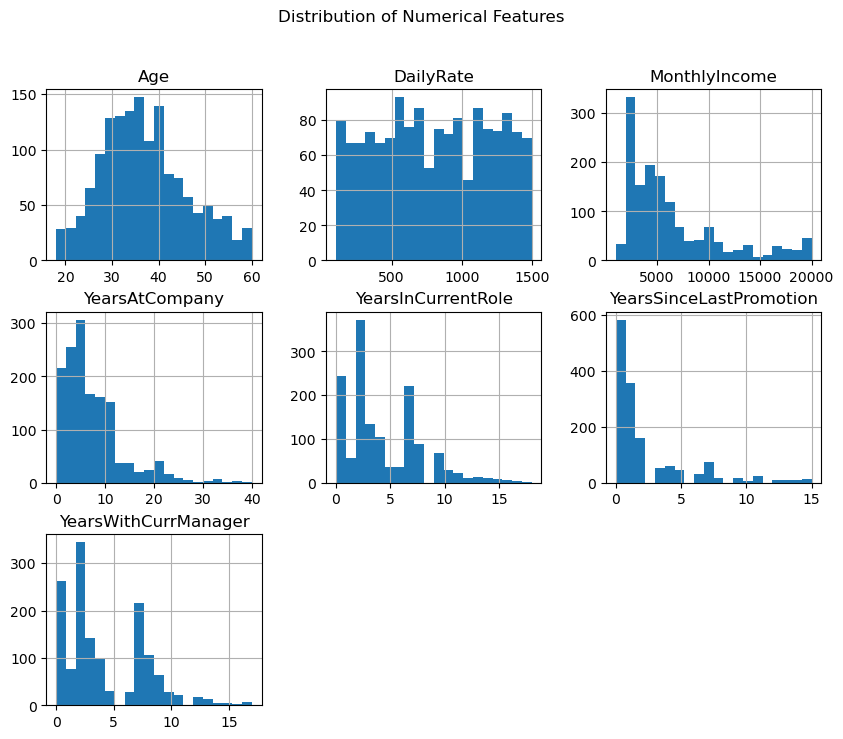

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

df[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# **Correlation Matrix for Numerical Columns only**

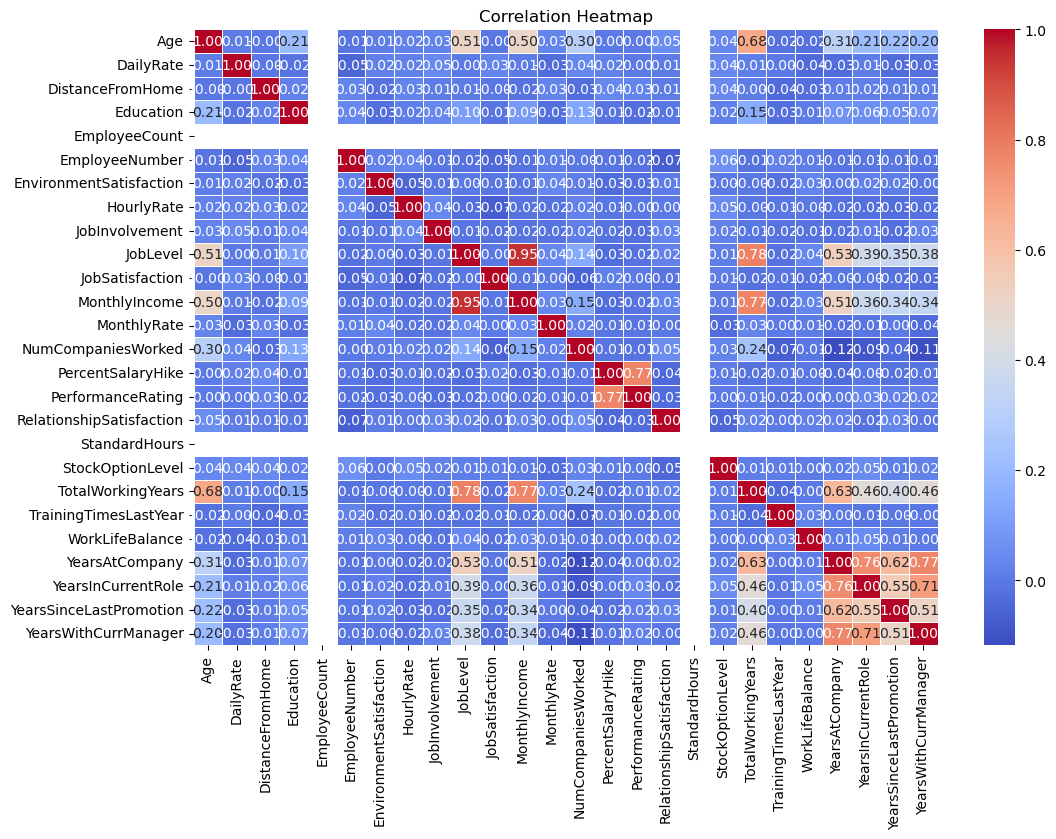

In [23]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns only
correlation_matrix = numerical_df.corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**After Removing Constant values**

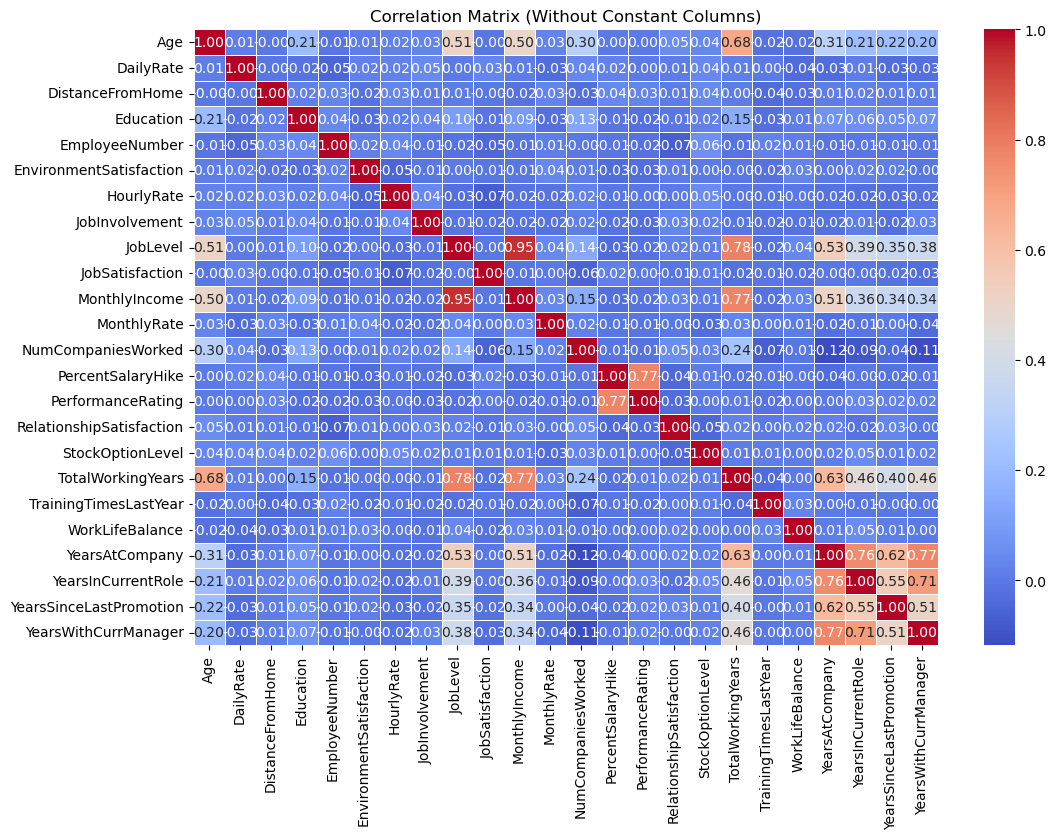

In [27]:
# Remove the constant columns (EmployeeCount and StandardHours)
df_cleaned = df.drop(columns=['EmployeeCount', 'StandardHours'])

# Select only numerical columns for correlation calculation
numerical_df_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix_cleaned = numerical_df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Without Constant Columns)')
plt.show()

#**Finding Missing Values**

In [30]:
missing_data = df.isnull().sum()
print(f"Missing Data Summary:\n{missing_data}")

Missing Data Summary:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

#**Pair Plot**
It is used to shows the relationships between multiple numerical variables

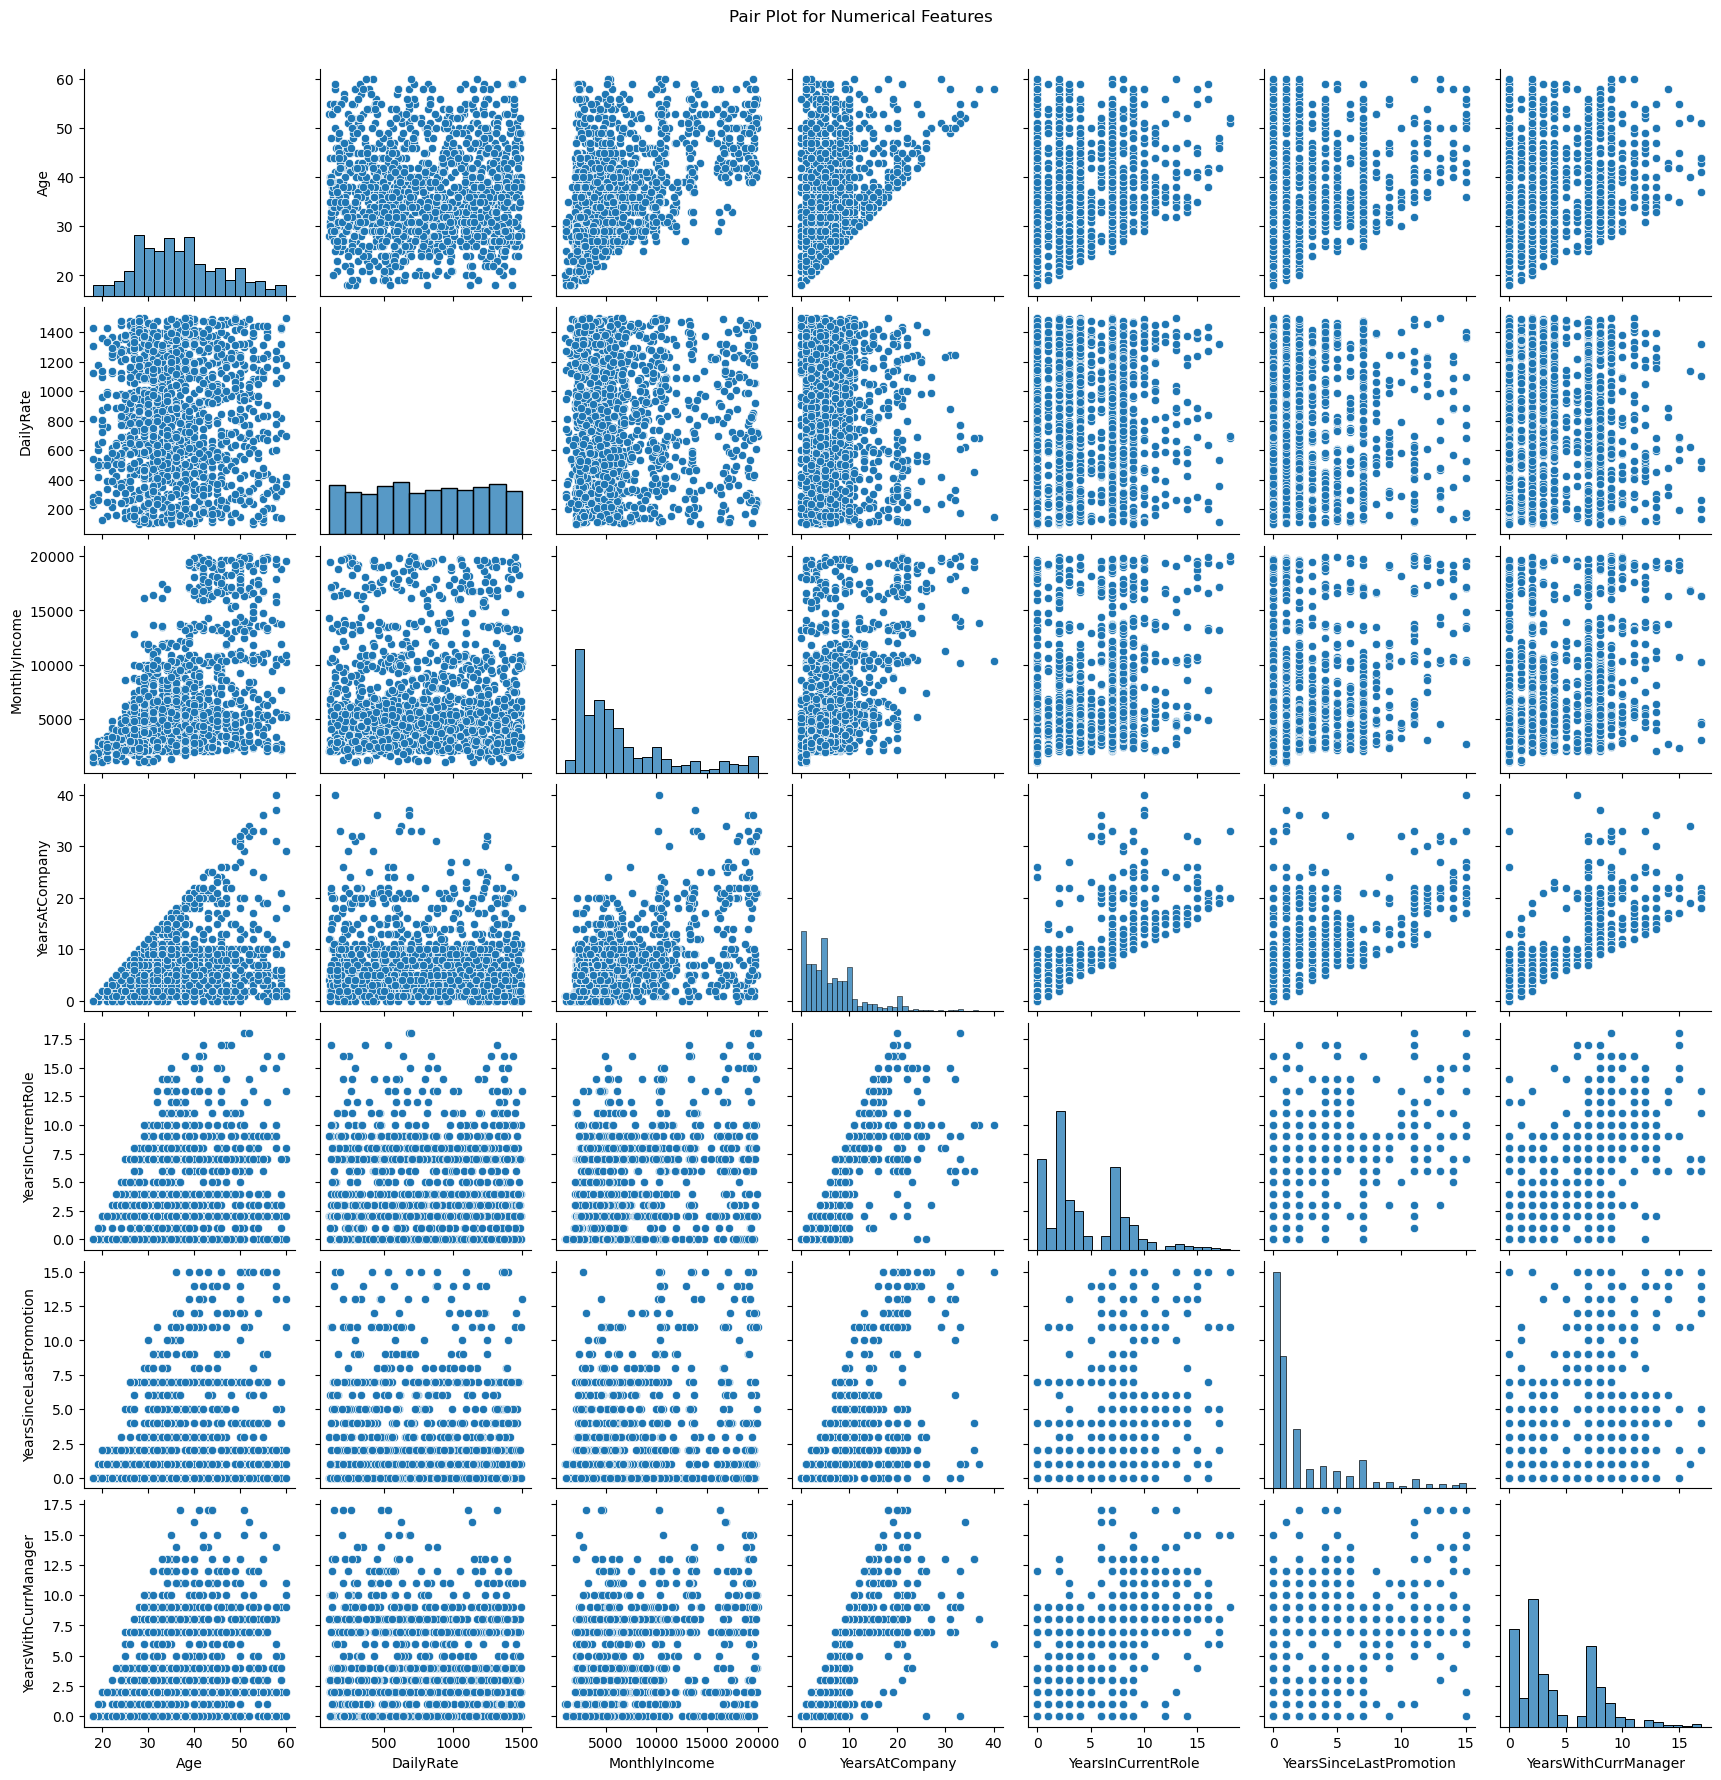

In [34]:
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

# **Label Encodding**

In [38]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

display(df_cleaned.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


# **Feature Splitting**
- Target variable is seprated from other variables
- The dataset is divided into train and test set

In [41]:
# --- Block 2: Split features/target ---
assert TARGET in df_cleaned.columns, f"TARGET '{TARGET}' not found."

X = df_cleaned.drop(columns=[TARGET]).copy()
y_raw = df_cleaned[TARGET].copy()

# If y is 'Yes'/'No' convert to 1/0; if already numeric, this keeps it numeric.
y = pd.Series(y_raw).replace({"Yes":1, "No":0}).astype(int).values

# Sanity: after your label encoding, all features should be numeric
assert np.all([np.issubdtype(dt, np.number) for dt in X.dtypes]), "Non-numeric columns found—please ensure label encoding is applied to ALL features."

print(f"X shape: {X.shape} | positives in y: {y.sum()} / {len(y)}")


X shape: (1470, 32) | positives in y: 237 / 1470


**Dividing dataset into train and test**

In [99]:
# --- Block 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)


# **Defining Basic Machine Learning Models**


In [102]:
# --- Block 4: Define BASIC models (LR, SVM, KNN, GB) ---
basic_models = {
    "LogReg": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE)
    ),
    "SVM_RBF": make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=RANDOM_STATE)
    ),
    "KNN": make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=15, weights="distance")
    ),
    "GB": make_pipeline(
        StandardScaler(),  # harmless for trees
        GradientBoostingClassifier(random_state=RANDOM_STATE)
    ),
}


# **Defining Ensemble Models**

In [105]:
# --- Block 6: Define ENSEMBLE models ---
# Re-use strong basics as components
lr_base  = basic_models["LogReg"]
svm_base = basic_models["SVM_RBF"]
gb_base  = basic_models["GB"]

ensemble_models = {
    "VotingSoft": VotingClassifier(
        estimators=[("lr", lr_base), ("svm", svm_base), ("gb", gb_base)],
        voting="soft", n_jobs=-1
    ),
    "Stacking": StackingClassifier(
        estimators=[("lr", lr_base), ("svm", svm_base), ("gb", gb_base)],
        final_estimator=LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE),
        passthrough=False, n_jobs=-1
    ),
    "RandomForest": make_pipeline(
        StandardScaler(),  # harmless
        RandomForestClassifier(
            n_estimators=500, max_depth=None, min_samples_leaf=2,
            class_weight="balanced", n_jobs=-1, random_state=RANDOM_STATE
        )
    ),
    "HistGB": make_pipeline(
        StandardScaler(),
        HistGradientBoostingClassifier(random_state=RANDOM_STATE)
    ),
}


# **Training all models with dataset**
ROC Curve, Precision Recall Curve, Confusion Matrix, and Evaluation Matrix is calculated here


=== LogReg: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.938     0.770     0.846       370
           1      0.380     0.732     0.500        71

    accuracy                          0.764       441
   macro avg      0.659     0.751     0.673       441
weighted avg      0.848     0.764     0.790       441



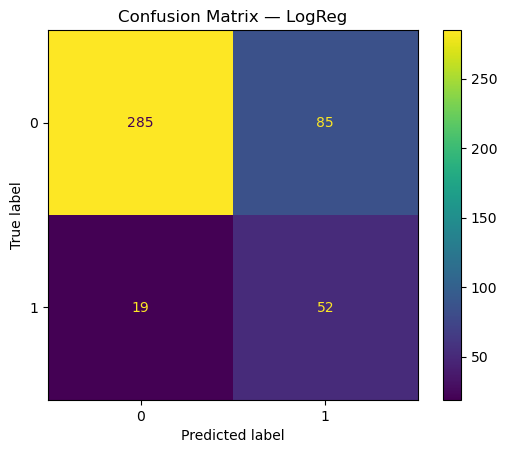

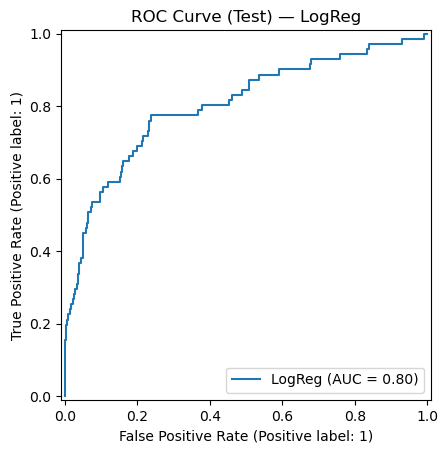

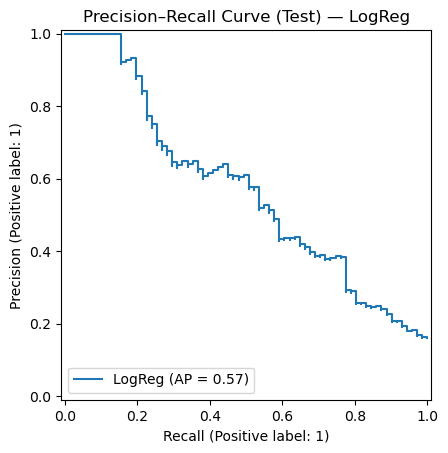


=== SVM_RBF: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.918     0.881     0.899       370
           1      0.488     0.592     0.535        71

    accuracy                          0.834       441
   macro avg      0.703     0.736     0.717       441
weighted avg      0.849     0.834     0.841       441



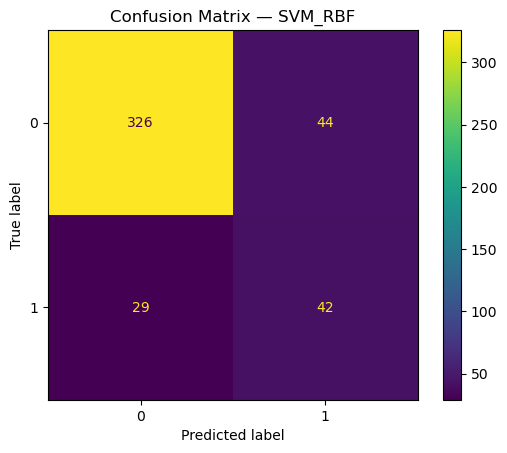

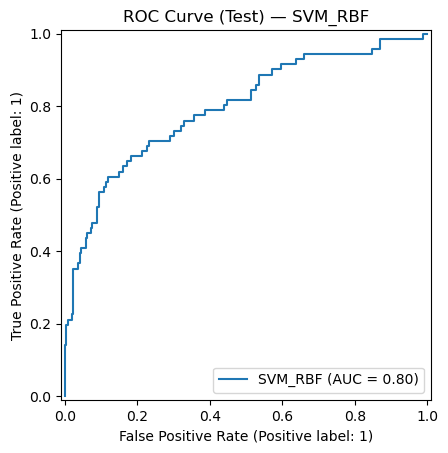

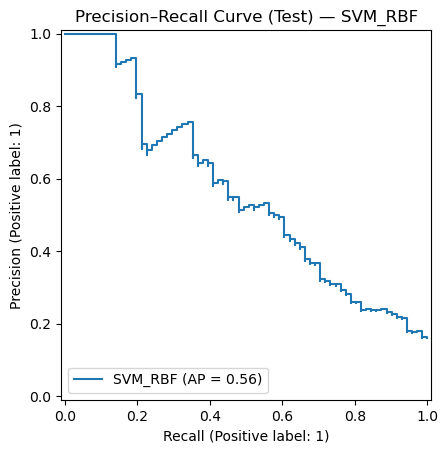


=== KNN: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.845     1.000     0.916       370
           1      1.000     0.042     0.081        71

    accuracy                          0.846       441
   macro avg      0.922     0.521     0.498       441
weighted avg      0.870     0.846     0.781       441



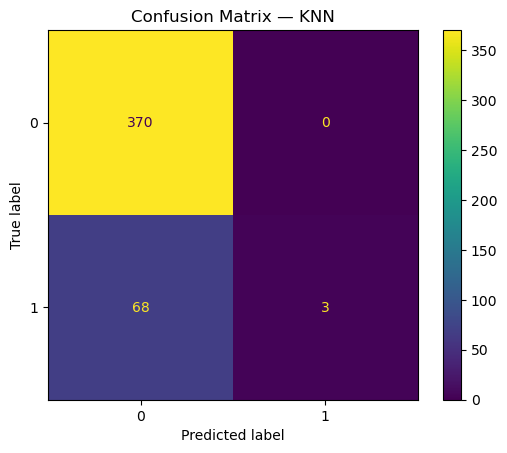

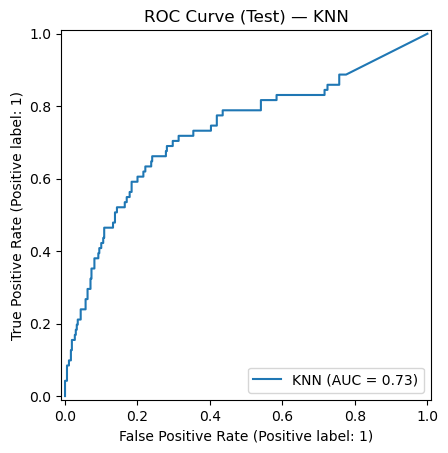

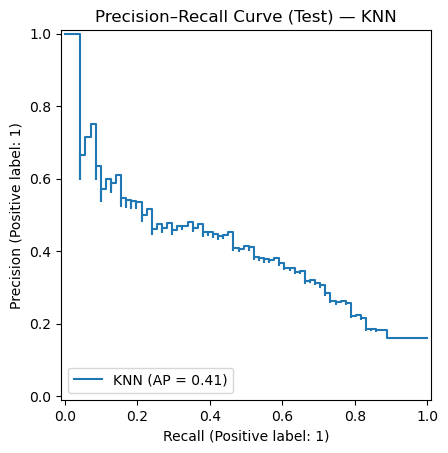


=== GB: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.866     0.957     0.909       370
           1      0.500     0.225     0.311        71

    accuracy                          0.839       441
   macro avg      0.683     0.591     0.610       441
weighted avg      0.807     0.839     0.813       441



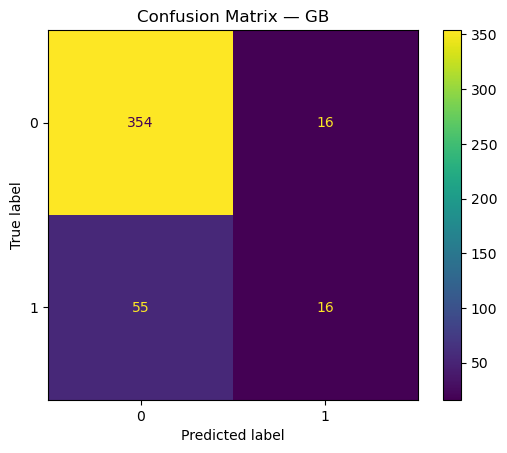

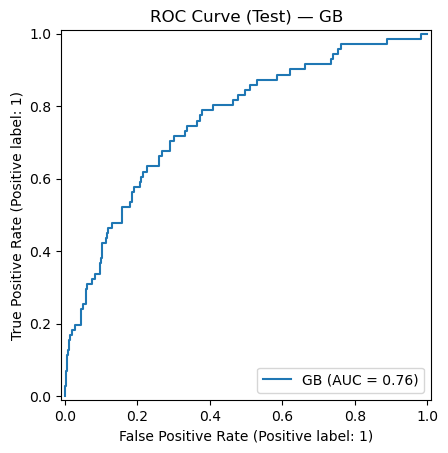

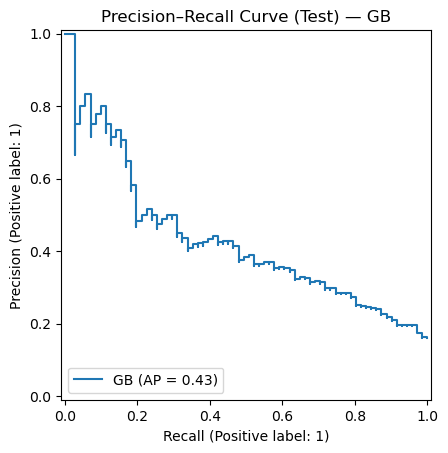


=== VotingSoft: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.881     0.965     0.921       370
           1      0.639     0.324     0.430        71

    accuracy                          0.862       441
   macro avg      0.760     0.644     0.676       441
weighted avg      0.842     0.862     0.842       441



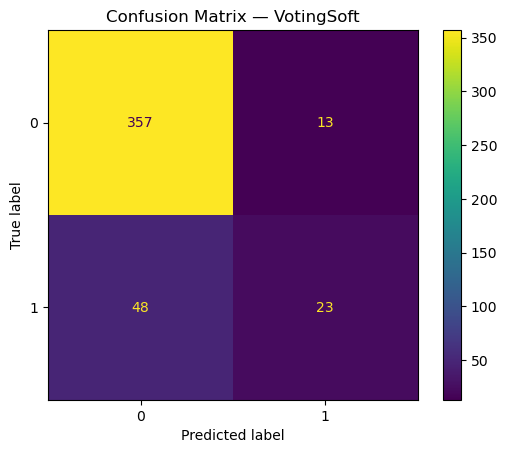

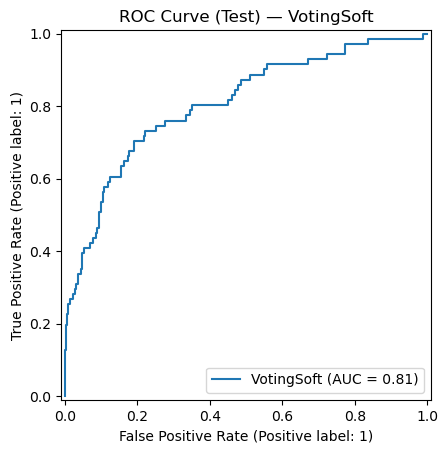

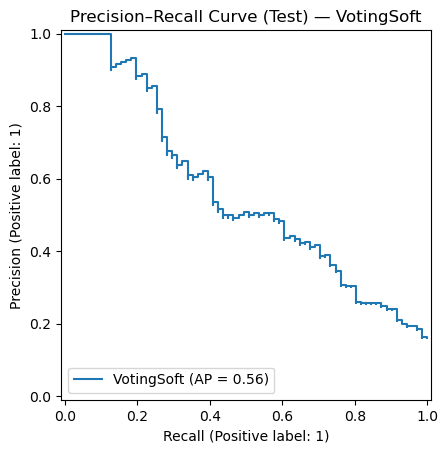


=== Stacking: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.926     0.808     0.863       370
           1      0.398     0.662     0.497        71

    accuracy                          0.785       441
   macro avg      0.662     0.735     0.680       441
weighted avg      0.841     0.785     0.804       441



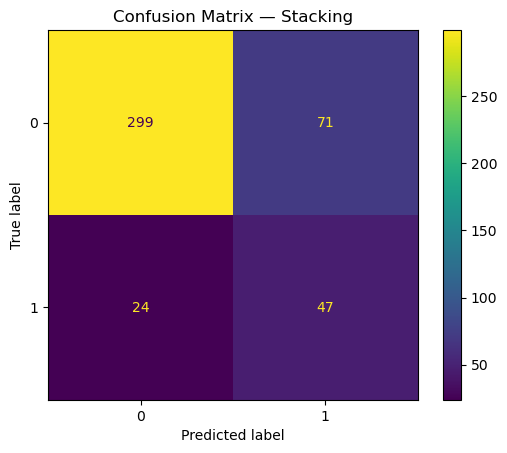

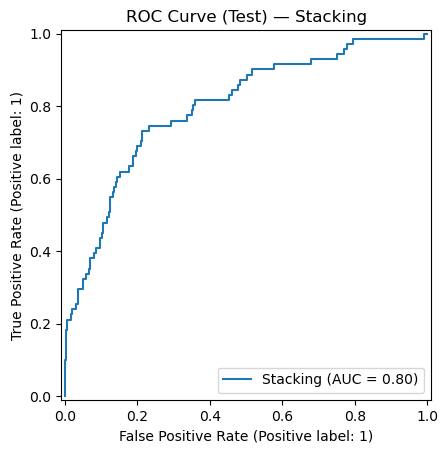

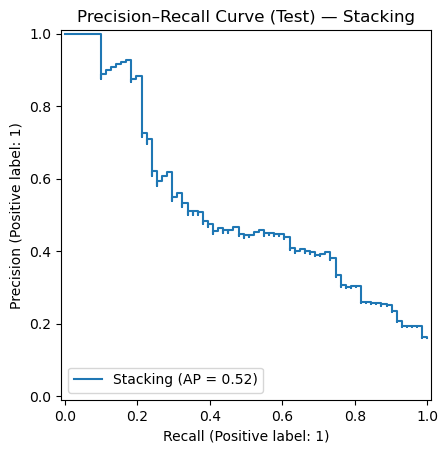


=== RandomForest: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.856     0.962     0.906       370
           1      0.440     0.155     0.229        71

    accuracy                          0.832       441
   macro avg      0.648     0.559     0.568       441
weighted avg      0.789     0.832     0.797       441



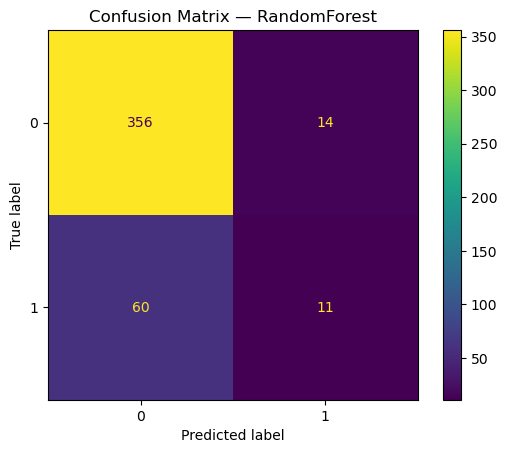

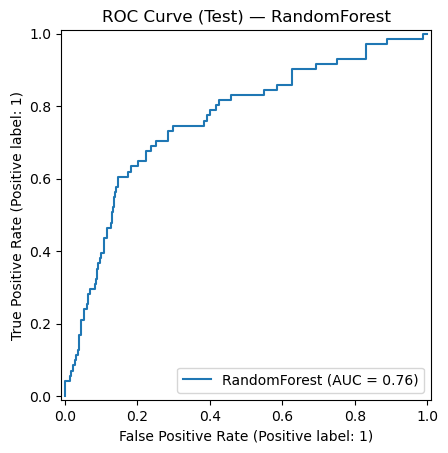

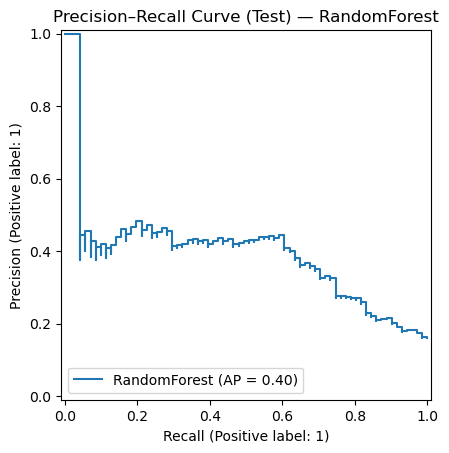


=== HistGB: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.862     0.965     0.911       370
           1      0.519     0.197     0.286        71

    accuracy                          0.841       441
   macro avg      0.690     0.581     0.598       441
weighted avg      0.807     0.841     0.810       441



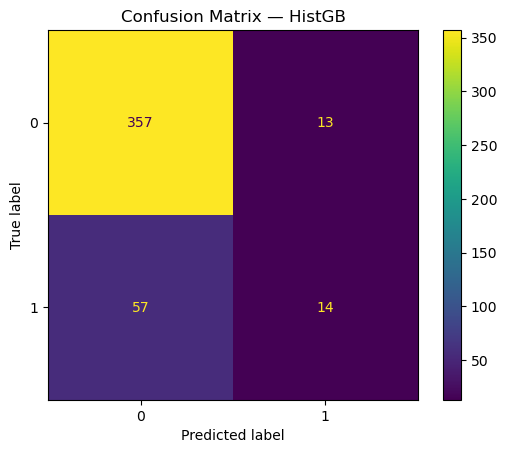

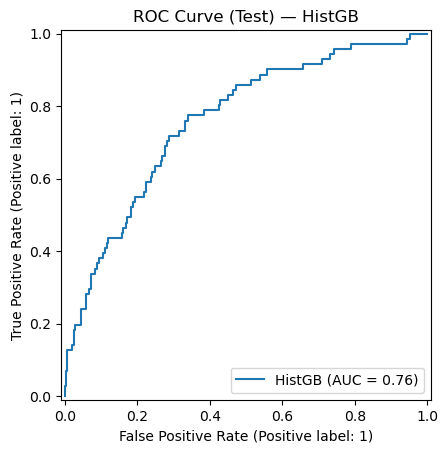

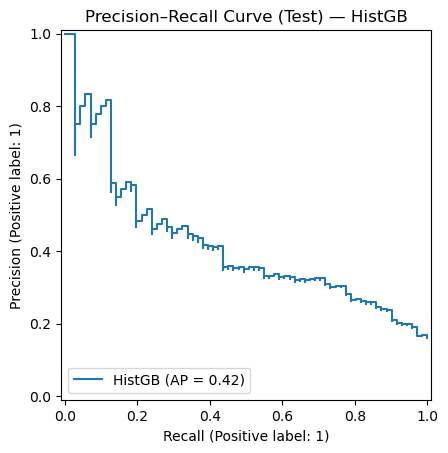


=== Metrics summary (sorted by ROC-AUC) ===
       model  accuracy  precision  recall    f1  balanced_acc  roc_auc  avg_precision
  VotingSoft     0.862      0.639   0.324 0.430         0.644    0.807          0.562
      LogReg     0.764      0.380   0.732 0.500         0.751    0.804          0.572
    Stacking     0.785      0.398   0.662 0.497         0.735    0.799          0.522
     SVM_RBF     0.834      0.488   0.592 0.535         0.736    0.796          0.561
          GB     0.839      0.500   0.225 0.311         0.591    0.762          0.431
RandomForest     0.832      0.440   0.155 0.229         0.559    0.761          0.396
      HistGB     0.841      0.519   0.197 0.286         0.581    0.761          0.420
         KNN     0.846      1.000   0.042 0.081         0.521    0.731          0.412


In [108]:
# --- Block 7: Fit ALL models & produce metrics + curves + confusion matrices ---

# Merge dictionaries to handle everything in one pass
all_models = {**basic_models, **ensemble_models}

metrics_rows = []

def evaluate_full(name, model, X_tr, y_tr, X_te, y_te):
    # Fit
    model.fit(X_tr, y_tr)

    # Scores
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
    else:
        # fallback to decision_function if no proba
        y_score = model.decision_function(X_te)
        # scale to [0,1] for plotting/metrics that expect probs
        y_proba = (y_score - y_score.min()) / (y_score.max() - y_score.min() + 1e-9)

    y_pred = model.predict(X_te)

    acc   = accuracy_score(y_te, y_pred)
    prec  = precision_score(y_te, y_pred, zero_division=0)
    rec   = recall_score(y_te, y_pred, zero_division=0)
    f1    = f1_score(y_te, y_pred, zero_division=0)
    bal   = balanced_accuracy_score(y_te, y_pred)
    roc   = roc_auc_score(y_te, y_proba)
    ap    = average_precision_score(y_te, y_proba)

    # Store metrics
    metrics_rows.append({
        "model": name, "accuracy": acc, "precision": prec, "recall": rec,
        "f1": f1, "balanced_acc": bal, "roc_auc": roc, "avg_precision": ap
    })

    # Classification report
    print(f"\n=== {name}: Classification Report (Test) ===")
    print(classification_report(y_te, y_pred, digits=3))

    # Confusion matrix plot
    cm = confusion_matrix(y_te, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(values_format='d')
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_te, y_proba, name=name)
    plt.title(f"ROC Curve (Test) — {name}")
    plt.show()

    # Precision-Recall curve
    PrecisionRecallDisplay.from_predictions(y_te, y_proba, name=name)
    plt.title(f"Precision–Recall Curve (Test) — {name}")
    plt.show()

for name, model in all_models.items():
    evaluate_full(name, model, X_train, y_train, X_test, y_test)

metrics_df = pd.DataFrame(metrics_rows).sort_values("roc_auc", ascending=False)
print("\n=== Metrics summary (sorted by ROC-AUC) ===")
print(metrics_df.round(3).to_string(index=False))


# **Calculating Train Time and test time for All models**

In [110]:
# --- Block: Train & inference timing for all models ---
import time


# Reuse your models dict(s); if `all_models` not present, merge basics + ensembles
try:
    _ = all_models
except NameError:
    all_models = {}
    try:
        all_models.update(basic_models)
    except NameError:
        pass
    try:
        all_models.update(ensemble_models)
    except NameError:
        pass

assert len(all_models) > 0, "No models found. Define `basic_models` / `ensemble_models` first."

timing_rows = []

for name, model in all_models.items():
    # Clone fresh estimator if needed to avoid refit side-effects across runs
    est = model

    # ---- Train timing ----
    t0 = time.perf_counter()
    est.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    # ---- Test (inference) timing ----
    # We’ll time both class prediction and score/proba (if available) and sum them.
    t1 = time.perf_counter()
    y_pred = est.predict(X_test)
    infer_time_pred = time.perf_counter() - t1

    if hasattr(est, "predict_proba"):
        t2 = time.perf_counter()
        _ = est.predict_proba(X_test)
        infer_time_score = time.perf_counter() - t2
    else:
        t2 = time.perf_counter()
        # fall back to decision_function if probabilities are unavailable
        if hasattr(est, "decision_function"):
            _ = est.decision_function(X_test)
        else:
            # nothing extra to time
            pass
        infer_time_score = time.perf_counter() - t2

    test_time = infer_time_pred + infer_time_score

    timing_rows.append({
        "model": name,
        "train_time_sec": train_time,
        "test_time_sec": test_time,
        "test_samples": len(X_test),
        "time_per_sample_ms": (test_time / len(X_test)) * 1000.0
    })

timing_df = pd.DataFrame(timing_rows).sort_values("train_time_sec")
print("\n=== Train/Test timing (seconds) ===")
print(timing_df.to_string(index=False, formatters={
    "train_time_sec": lambda x: f"{x:.4f}",
    "test_time_sec": lambda x: f"{x:.4f}",
    "time_per_sample_ms": lambda x: f"{x:.3f}"
}))



=== Train/Test timing (seconds) ===
       model train_time_sec test_time_sec  test_samples time_per_sample_ms
         KNN         0.0146        0.1237           441              0.280
      LogReg         0.0843        0.0163           441              0.037
     SVM_RBF         0.8722        0.2347           441              0.532
          GB         1.6739        0.0238           441              0.054
  VotingSoft         1.7432        0.2341           441              0.531
      HistGB         2.8197        0.0570           441              0.129
RandomForest         3.3908        0.8217           441              1.863
    Stacking         4.6873        0.2384           441              0.541


# **Implementing K-fold Cross Validation**

In [112]:
# --- Block: K-Fold Cross-Validation for all models (simple) ---
from sklearn.model_selection import StratifiedKFold, cross_validate

# Reuse your model dict(s); if `all_models` not present, merge basics + ensembles
try:
    _ = all_models
except NameError:
    all_models = {}
    try:
        all_models.update(basic_models)
    except NameError:
        pass
    try:
        all_models.update(ensemble_models)
    except NameError:
        pass

assert len(all_models) > 0, "No models found. Define `basic_models` / `ensemble_models` first."

N_SPLITS = 5
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "balanced_accuracy": "balanced_accuracy",
    "roc_auc": "roc_auc",
}

rows = []
for name, model in all_models.items():
    cv_res = cross_validate(
        model, X, y,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )
    rows.append({
        "model": name,
        **{f"mean_{k}": np.mean(v) for k, v in cv_res.items() if k.startswith("test_")},
        **{f"std_{k}":  np.std(v)  for k, v in cv_res.items() if k.startswith("test_")},
    })

# Tidy up column names (test_accuracy -> accuracy)
def tidy_cols(df):
    new_cols = {}
    for c in df.columns:
        if c.startswith("mean_test_"):
            new_cols[c] = c.replace("mean_test_", "mean_")
        elif c.startswith("std_test_"):
            new_cols[c] = c.replace("std_test_", "std_")
    return df.rename(columns=new_cols)

cv_df = tidy_cols(pd.DataFrame(rows)).sort_values("mean_roc_auc", ascending=False)

# Display concise table rounded to 3 decimals
display_cols = ["model","mean_roc_auc","std_roc_auc","mean_f1","std_f1",
                "mean_accuracy","std_accuracy","mean_balanced_accuracy","std_balanced_accuracy",
                "mean_precision","std_precision","mean_recall","std_recall"]
print(cv_df[display_cols].round(3).to_string(index=False))


       model  mean_roc_auc  std_roc_auc  mean_f1  std_f1  mean_accuracy  std_accuracy  mean_balanced_accuracy  std_balanced_accuracy  mean_precision  std_precision  mean_recall  std_recall
  VotingSoft         0.830        0.022    0.528   0.026          0.876         0.009                   0.696                  0.015           0.691          0.057        0.430       0.035
    Stacking         0.829        0.022    0.512   0.019          0.782         0.016                   0.752                  0.015           0.401          0.022        0.709       0.035
     SVM_RBF         0.818        0.018    0.509   0.038          0.822         0.012                   0.722                  0.028           0.458          0.031        0.574       0.059
          GB         0.812        0.014    0.427   0.027          0.865         0.009                   0.642                  0.012           0.693          0.088        0.312       0.029
      LogReg         0.811        0.019    0.471   0.01